In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
df = pd.read_csv('trainM.csv')
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,600.000000,600.000000,600.000000
mean,0.648918,0.687188,0.813644,0.430948,0.449251,144.850362,27.429285,0.540765,1.038333,0.688333,6920.379867
std,0.477706,0.464025,1.199394,0.495621,0.497832,81.246122,8.540662,0.498751,0.788183,0.463561,6213.130723
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,30.000000,0.000000,0.000000,0.000000,4158.250000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,128.000000,30.000000,1.000000,1.000000,1.000000,5407.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,162.000000,30.000000,1.000000,2.000000,1.000000,7451.500000
max,1.000000,1.000000,4.000000,1.000000,1.000000,650.000000,40.000000,1.000000,2.000000,1.000000,81000.000000


In [2]:
df.head(15)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,0,0,146.412162,30.0,0,2.0,1.0,5849.0
1,1,0,1,1,1,128.000000,30.0,0,0.0,0.0,6091.0
2,1,1,0,0,0,66.000000,30.0,1,2.0,1.0,3000.0
3,1,1,0,1,1,120.000000,30.0,1,2.0,1.0,4941.0
4,0,1,0,0,0,141.000000,30.0,0,2.0,1.0,6000.0
5,1,1,2,1,1,267.000000,30.0,1,2.0,1.0,9613.0
6,1,1,0,0,0,95.000000,30.0,1,2.0,1.0,3849.0
7,1,0,4,1,1,158.000000,30.0,0,1.0,0.0,5540.0
8,1,1,2,0,0,168.000000,30.0,1,2.0,1.0,5532.0
9,1,0,1,1,1,349.000000,30.0,0,1.0,0.0,23809.0


In [3]:
df['Property_Area'].fillna(0,inplace= True)
df['Loan_Status'].fillna(1,inplace=True)
df['Total_Income'].fillna(0,inplace = True)
df.replace({'Gender':{10:0}},inplace=True)
df=df.dropna()
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
dtype: int64

In [4]:
#Creating a list of numerical columns
# num_cols = num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [5]:
# df[num_cols].describe()

In [6]:
#Converting the scale of loan term from months to years becuase we have a day
# df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

In [7]:
#Adding the applicant and co-applicant income to get the total income per application
# df['Total_Income']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [8]:
#Dropping the columns as we created a new column which captures the same information
# df=df.drop(['ApplicantIncome', 'CoapplicantIncome'],axis = 1)

In [9]:
#Checking the distribution and outliers for each column in the data
# for col in ['LoanAmount', 'Total_Income']:
#     print(col)
#     plt.figure(figsize=(15,4))
#     plt.subplot(1,2,1)
#     df[col].hist(bins=10, grid=True)
#     plt.ylabel('count')
#     plt.subplot(1,2,2)
#     sns.boxplot(x=df[col])
#     plt.show()

In [10]:
#Both the variables are highly skewed to the right and have many outliers which can be expected as the data contains different types of areas - Rural, Urban & Semi-Urban.
#We can observe from the histogram that majority of values for total income are less than 10,000K dollars.
#Now, let's check the percentage of observations in each category for all the categorical variables.

In [11]:
#Creating list of categorical columns
categorical_clmn= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for clmn in categorical_clmn:
    print(df[clmn].value_counts(normalize=True)) 
    print('-'*30)    

1    0.648918
0    0.351082
Name: Gender, dtype: float64
------------------------------
1    0.687188
0    0.312812
Name: Married, dtype: float64
------------------------------
0    0.589018
1    0.168053
2    0.163062
4    0.079867
Name: Dependents, dtype: float64
------------------------------
0    0.569052
1    0.430948
Name: Education, dtype: float64
------------------------------
0    0.550749
1    0.449251
Name: Self_Employed, dtype: float64
------------------------------
1    0.540765
0    0.459235
Name: Credit_History, dtype: float64
------------------------------
1.0    0.377704
2.0    0.329451
0.0    0.292845
Name: Property_Area, dtype: float64
------------------------------
1.0    0.688852
0.0    0.311148
Name: Loan_Status, dtype: float64
------------------------------


In [12]:
#The vast majority of applicants are male (81%).

#65% of applicants are married, and 57% of them have no dependents

#78% of the applicants are graduates

#85% of the applicants are self employed

#84% of the applicants have credit histories that meet the required guidelines

#The property area among the applicants is roughly evenly split across semiurban, urban, and rural, with semi-urban having a slightly higher portion (37.9%)

In [13]:
#Finally, we need to encode our loan status column to make it eligible for modeling, and replace other columns to avoid empty raws

In [14]:
# df['Married'].fillna("Yes",inplace=True)
# df['Dependents'].fillna(0,inplace= True)
# df['Self_Employed'].fillna('No',inplace=True)
# df['Credit_History'].fillna(0,inplace = True)

# df=df.replace(to_replace='3+',value=4)
# df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

# mean_loan=df['LoanAmount'].mean()
# df['LoanAmount'].fillna(mean_loan,inplace = True)

# mean_loan_term=df['Loan_Amount_Term'].mean()
# df['Loan_Amount_Term'].fillna(mean_loan_term,inplace = True)

# df=df.dropna()
# df.isnull().sum()

In [15]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
596,0,1,0,1,0,71.0,30.0,0,0.0,1.0,2900.0
597,1,1,4,1,0,40.0,0.0,1,0.0,1.0,4106.0
598,1,1,1,0,1,253.0,30.0,1,2.0,1.0,8312.0
599,1,1,2,0,0,187.0,30.0,0,2.0,1.0,7583.0
600,0,0,0,1,1,133.0,30.0,0,1.0,0.0,4583.0


In [16]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.648918,0.687188,0.813644,0.430948,0.449251,144.850362,27.429285,0.540765,1.036606,0.688852,6908.865091
std,0.477706,0.464025,1.199394,0.495621,0.497832,81.246122,8.540662,0.498751,0.788664,0.463349,6214.365751
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,30.000000,0.000000,0.000000,0.000000,4153.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,128.000000,30.000000,1.000000,1.000000,1.000000,5398.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,162.000000,30.000000,1.000000,2.000000,1.000000,7451.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,650.000000,40.000000,1.000000,2.000000,1.000000,81000.000000


In [17]:
#Now when DF is ready let look at plots to see how different Nodes have impact on Loan status where 0 is No and 1 is Yes

<AxesSubplot:xlabel='Education', ylabel='count'>

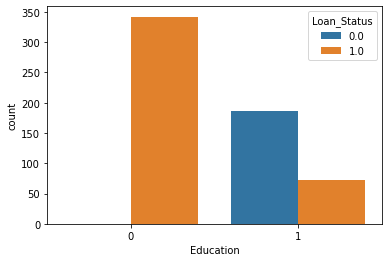

In [18]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [19]:
# plot demonstatre that graduate person has bigger percent of approved loan.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

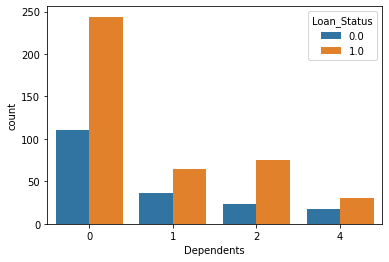

In [20]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

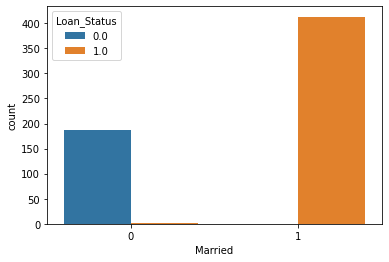

In [21]:
sns.countplot(x='Married', hue='Loan_Status', data = df)

In [22]:
# plot demonstatre that married person has bigger percent of approved loan beacuse there can have a pair income

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

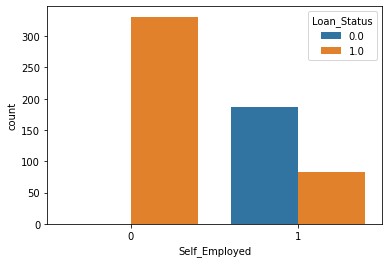

In [23]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data = df)

In [24]:
# plot show that self employed people has Denied more becuase they have risk be a bacnrupt

<AxesSubplot:xlabel='Gender', ylabel='count'>

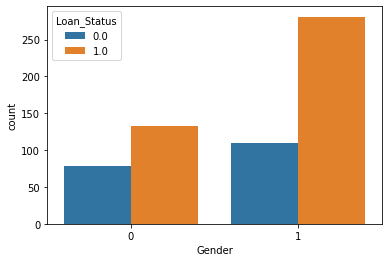

In [25]:
sns.countplot(x='Gender', hue='Loan_Status', data = df)

In [26]:
# male has more aproved

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

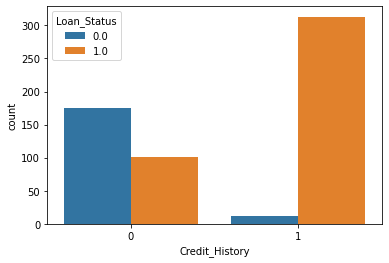

In [27]:
sns.countplot(x='Credit_History', hue='Loan_Status', data = df)

In [28]:
#The plot shows that credit history is an important factor while checking loan eligibility. 
#There are very few customers whose loan was approved even when their credit history did not meet required guideline

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

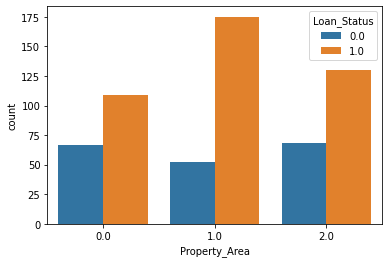

In [29]:
sns.countplot(x='Property_Area', hue='Loan_Status', data = df)

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

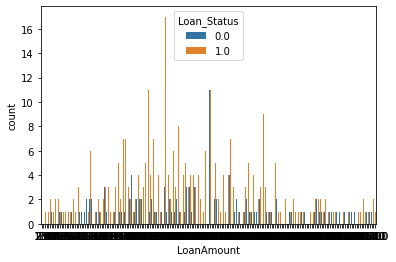

In [30]:
sns.countplot(x='LoanAmount', hue='Loan_Status', data = df)

In [31]:
# it also important plot because area demonstrate the ability to make money

In [32]:
# plt.figure(figsize=(13,9))
# sns.regplot(x='LoanAmount', y='Total_Income', data=df)
# plt.show()

In [33]:
#The plot shows that the loan amount is positively correlated with total income. This implies that the loan amount for higher-income applicants is progressively higher.
#There are some outliers visible, showing applicants with low income having been given loans of a higher amount.

In [34]:
#Now that we have processed and explored our data, let's prepare it for Modeling.

In [35]:
#https://www.kaggle.com/code/patrickparsa/loan-eligibility-with-logistic-regression-and-knn

In [36]:

# df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
#                       'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}, 'Loan_Status':{'N':0,'Y':1}, 'Credit_History':{'0.0':0, '1.0': 1}},inplace=True)

# df['Married']  = df['Married'].astype(int)
# df['Gender']  = df['Gender'].astype(int)
# df['Education']  = df['Education'].astype(int)
# df['Self_Employed']  = df['Self_Employed'].astype(int)
# df['Property_Area']  = df['Property_Area'].astype(int)
# df['Loan_Status']  = df['Loan_Status'].astype(int)
# df['Credit_History']  = df['Credit_History'].astype(int
# df.head(5)

In [37]:
import networkx as nx

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


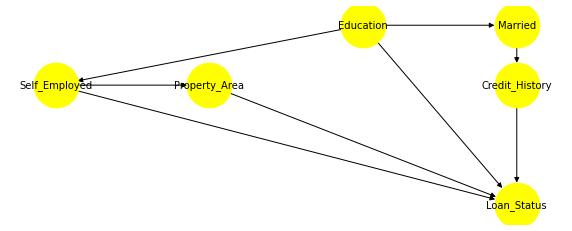

In [38]:
#In this part the model and network are illustarted
from pgmpy.models import BayesianModel
model=BayesianModel([
    ('Education', 'Married'),
    ('Education', 'Self_Employed'),
    ('Self_Employed', 'Property_Area'),
    ('Married', 'Credit_History'),
    ('Credit_History', 'Loan_Status'),
    ('Property_Area', 'Loan_Status'),
    ('Self_Employed', 'Loan_Status'),
    ('Education', 'Loan_Status'),
])
fig, ax = plt.subplots(figsize=(10, 4))

positions={ 'Education':(5.9,3),
          'Married':(6,3), 'Self_Employed':(5.7,2), 'Property_Area':(5.8,2), 'Credit_History':(6,2),  'Loan_Status':(6,0)  }
nx.draw(model, pos=positions, with_labels=True, node_size = 2000, font_size =10, arrowsize=10, node_color='yellow', ax=ax)

In [39]:
#'Married':{'No':0,'Yes':1},'Self_Employed':{'No':0,'Yes':1},
                      #'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}, 'Loan_Status':{'N':0,'Y':1}, 'Credit_History':{'no':0, 'yes': 1}

In [40]:
categorical_clmn= [ 'Married', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for clmn in categorical_clmn:
    print(df[clmn].value_counts(normalize=True)) 
    print('*'*20)   

1    0.687188
0    0.312812
Name: Married, dtype: float64
********************
0    0.569052
1    0.430948
Name: Education, dtype: float64
********************
0    0.550749
1    0.449251
Name: Self_Employed, dtype: float64
********************
1    0.540765
0    0.459235
Name: Credit_History, dtype: float64
********************
1.0    0.377704
2.0    0.329451
0.0    0.292845
Name: Property_Area, dtype: float64
********************
1.0    0.688852
0.0    0.311148
Name: Loan_Status, dtype: float64
********************


In [41]:
def one_node_prob(node1): #find probability 
    a = np.unique(node1) 
    values_v1 = [] 
    for A  in a: 
        values_v1.append(np.count_nonzero(node1 == A)/len(node1))
    return values_v1

def two_node_prob(node1, node2, len1, len2): 
    array = np.array(pd.crosstab(df[node1], df[node2]))
    probability = [] 
    for i in array:
        arr = []
        for j in i:
            arr.append(j/len(df[node1]))
        probability.append(arr)
    return probability

def three_node_prob(node1, node2, node3): 
    a = np.unique(df[node1]) 
    b = np.unique(df[node2]) 
    c = np.unique(df[node3]) 
    three_probability = [] 
    for A  in a: 
        values_v123 = [] 
        for B in b:
            for C in c:
                values_v123.append(((df[node1]==A)&(df[node2]==B)&(df[node3]==C)).sum()/len(df[node1]))
        three_probability.append(values_v123)
    return three_probability

def five_node_prob(node1, node2, node3, node4, node5): 
    a = np.unique(df[node1]) 
    b = np.unique(df[node2]) 
    c = np.unique(df[node3]) 
    d = np.unique(df[node4]) 
    e = np.unique(df[node5])
    five_probability = [] 
    for A  in a: 
        values_v12345 = [] 
        for B in b:
            for C in c:
                for D in d:
                     for E in e:
                        values_v12345.append(((df[node1]==A)&(df[node2]==B)&(df[node3]==C)&(df[node4]==D)&(df[node5]==E)).sum()/len(df[node1]))
        five_probability.append(values_v12345)
    return five_probability

In [42]:
probability_of_education = one_node_prob(df['Education'])
print(probability_of_education)

[0.5690515806988353, 0.43094841930116473]


In [43]:
probability_of_married = two_node_prob('Education', 'Married', 2, 2) 
print(probability_of_married)

[[0.0, 0.5690515806988353], [0.31281198003327787, 0.11813643926788686]]


In [44]:
probability_of_self_employed = two_node_prob('Education', 'Self_Employed', 2, 2) 
print(probability_of_self_employed)

[[0.480865224625624, 0.08818635607321132], [0.06988352745424292, 0.3610648918469218]]


In [45]:
probability_of_property_area = two_node_prob('Self_Employed', 'Property_Area', 2, 3) 
print(probability_of_property_area)

[[0.1464226289517471, 0.22462562396006655, 0.17970049916805325], [0.1464226289517471, 0.15307820299500832, 0.1497504159733777]]


In [46]:
probability_of_credit_history = two_node_prob( 'Married','Credit_History', 2, 2) 
print(probability_of_credit_history)

[[0.2928452579034942, 0.019966722129783693], [0.16638935108153077, 0.5207986688851913]]


In [47]:
probability_of_loan_status = five_node_prob( 'Education','Self_Employed','Property_Area','Credit_History', 'Loan_Status') 
print(probability_of_loan_status)

[[0.0, 0.016638935108153077, 0.0, 0.10981697171381032, 0.0, 0.04326123128119801, 0.0, 0.15806988352745424, 0.0, 0.036605657237936774, 0.0, 0.11647254575707154, 0.0, 0.0, 0.0, 0.021630615640599003, 0.0, 0.018302828618968387, 0.0, 0.026622296173044926, 0.0, 0.004991680532445923, 0.0, 0.016638935108153077], [0.0, 0.004991680532445923, 0.0, 0.014975041597337771, 0.0, 0.013311148086522463, 0.0, 0.009983361064891847, 0.0, 0.011647254575707155, 0.0, 0.014975041597337771, 0.10815307820299501, 0.004991680532445923, 0.0033277870216306157, 0.008319467554076539, 0.08319467554076539, 0.009983361064891847, 0.0033277870216306157, 0.011647254575707155, 0.09983361064891846, 0.0033277870216306157, 0.013311148086522463, 0.011647254575707155]]


In [48]:
np.reshape(probability_of_property_area, (3, -1))

array([[0.14642263, 0.22462562],
       [0.1797005 , 0.14642263],
       [0.1530782 , 0.14975042]])

In [49]:
np.reshape(probability_of_credit_history, (-1, 2)),

(array([[0.29284526, 0.01996672],
        [0.16638935, 0.52079867]]),)

In [50]:
#Lets add probability
from pgmpy.factors.discrete import TabularCPD
Education_cpd = TabularCPD('Education', 2, np.reshape(probability_of_education, (-1, 1)))

# Education_cpd = TabularCPD(variable='Education', variable_card=2, 
#                           values=np.reshape(probability_of_education, (-1, 2)),
#                           evidence=['Gender'],
#                           evidence_card=[2])
Self_employed_cpd = TabularCPD(variable='Self_Employed', variable_card=2, 
                          values=np.reshape(probability_of_self_employed, (-1, 2)),
                          evidence=['Education'],
                          evidence_card=[2])

Property_area_cpd = TabularCPD(variable='Property_Area', variable_card=3, 
                          values=np.reshape(probability_of_property_area, (3, -1)),
                          evidence=['Self_Employed'],
                          evidence_card=[2])


Married_cpd = TabularCPD(variable='Married', variable_card=2, 
                          values=np.reshape(probability_of_married, (-1, 2)),
                          evidence=['Education'],
                          evidence_card=[2])


Credit_History_cpd = TabularCPD(variable='Credit_History', variable_card=2, 
                          values=np.reshape(probability_of_credit_history, (-1, 2)),
                          evidence=['Married'],
                          evidence_card=[2])

Loan_status_cpd = TabularCPD(variable='Loan_Status', variable_card=2, 
                          values=np.reshape(probability_of_loan_status, (-1, 24)),
                          evidence=['Education','Self_Employed', 'Property_Area', 'Credit_History'],
                          evidence_card=[2, 2, 3, 2])

In [51]:
#'Married':{'No':0,'Yes':1},'Self_Employed':{'No':0,'Yes':1},
                      #'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}, 'Loan_Status':{'N':0,'Y':1}, 'Credit_History':{'no':0, 'yes': 1}

In [62]:
model.add_cpds( Education_cpd, Self_employed_cpd, Property_area_cpd, Married_cpd, Credit_History_cpd, Loan_status_cpd)
model.fit(df)
print('Model state: ', model.check_model())
print(Loan_status_cpd)

Model state:  True
+----------------+-------------------+-----+----------------------+----------------------+
| Education      | Education(0)      | ... | Education(1)         | Education(1)         |
+----------------+-------------------+-----+----------------------+----------------------+
| Self_Employed  | Self_Employed(0)  | ... | Self_Employed(1)     | Self_Employed(1)     |
+----------------+-------------------+-----+----------------------+----------------------+
| Property_Area  | Property_Area(0)  | ... | Property_Area(2)     | Property_Area(2)     |
+----------------+-------------------+-----+----------------------+----------------------+
| Credit_History | Credit_History(0) | ... | Credit_History(0)    | Credit_History(1)    |
+----------------+-------------------+-----+----------------------+----------------------+
| Loan_Status(0) | 0.0               | ... | 0.0                  | 0.016638935108153077 |
+----------------+-------------------+-----+----------------------+----

In [53]:
model.local_independencies(['Loan_Status',  'Education', 'Self_Employed', 'Property_Area', 'Married', 'Credit_History'])

(Loan_Status ⟂ Married | Property_Area, Self_Employed, Education, Credit_History)
(Self_Employed ⟂ Married, Credit_History | Education)
(Property_Area ⟂ Education, Married, Credit_History | Self_Employed)
(Married ⟂ Self_Employed, Property_Area | Education)
(Credit_History ⟂ Self_Employed, Education, Property_Area | Married)

In [54]:
#'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      #'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':0,'Not Graduate':1}, 'Loan_Status':{'N':0,'Y':1}, 'Credit_History':{'0.0':0, '1.0': 1}

In [68]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
q1=infer.query(variables=['Loan_Status'],evidence={ 'Education':1,'Self_Employed':1, 'Credit_History':0,   'Property_Area':2, })
print("Query with 4 node (all)", q1)
q2=infer.query(variables=['Loan_Status'],evidence={ 'Credit_History':0, })
print("Query with Credit_History",q2)
q3=infer.query(variables=['Loan_Status'],evidence={ 'Property_Area':2, })
print("Query with Property_Area",q3)
q4=infer.query(variables=['Loan_Status'],evidence={ 'Self_Employed':1, })
print("Query with 'Self_Employed')",q4)
q5=infer.query(variables=['Loan_Status'],evidence={ 'Education':0 })
print("Query with 'Education')",q5)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Query with 4 node (all) +------------------+--------------------+
| Loan_Status      |   phi(Loan_Status) |
+==================+====================+
| Loan_Status(0.0) |             0.9677 |
+------------------+--------------------+
| Loan_Status(1.0) |             0.0323 |
+------------------+--------------------+


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Query with Credit_History +------------------+--------------------+
| Loan_Status      |   phi(Loan_Status) |
+==================+====================+
| Loan_Status(0.0) |             0.5579 |
+------------------+--------------------+
| Loan_Status(1.0) |             0.4421 |
+------------------+--------------------+


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Query with Property_Area +------------------+--------------------+
| Loan_Status      |   phi(Loan_Status) |
+==================+====================+
| Loan_Status(0.0) |             0.3132 |
+------------------+--------------------+
| Loan_Status(1.0) |             0.6868 |
+------------------+--------------------+


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Query with 'Self_Employed') +------------------+--------------------+
| Loan_Status      |   phi(Loan_Status) |
+==================+====================+
| Loan_Status(0.0) |             0.0000 |
+------------------+--------------------+
| Loan_Status(1.0) |             1.0000 |
+------------------+--------------------+


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Query with 'Education') +------------------+--------------------+
| Loan_Status      |   phi(Loan_Status) |
+==================+====================+
| Loan_Status(0.0) |             0.0061 |
+------------------+--------------------+
| Loan_Status(1.0) |             0.9939 |
+------------------+--------------------+


In [56]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,0,0,146.412162,30.0,0,2.0,1.0,5849.0
1,1,0,1,1,1,128.000000,30.0,0,0.0,0.0,6091.0


In [57]:
import re
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.5, random_state=100)
X_train=train.iloc[:, [False,True, False, True, True, False, False, True, True, False, False]]
X_test=test.iloc[:, [False,True, False, True, True, False, False, True, True, False, False]]
y_train=train['Loan_Status']
y_test=test['Loan_Status']

In [58]:
from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(train, estimator=MaximumLikelihoodEstimator)

In [59]:
from sklearn.metrics import r2_score
train_accuracy=r2_score(y_train,model.predict(X_train))
train_accuracy

  0%|          | 0/28 [00:00<?, ?it/s]

0.7827530022328164

In [60]:
y_pred = model.predict(X_test)

  0%|          | 0/27 [00:00<?, ?it/s]

In [61]:
test_accuracy=r2_score(y_test,y_pred)
test_accuracy

0.7599681020733653